# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209284 entries, 0 to 209283
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   title   209284 non-null  object 
 1   year    209283 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009.0
1,Parallel Worlds: A New Rock Music Experience,2016.0
2,Morita - La hija de Jesus,2008.0
3,Gun,2017.0
4,Love or Nothing at All,2014.0


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [7]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [10]:
len(movies)

209284

### List all Batman movies ever made

In [11]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943.0
150621,Batman,1989.0


### List all Batman movies ever made - the right approach

In [12]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 33


,title,year
16813,Batman: Anarchy,2016.0
30236,Batman Forever,1995.0
31674,Batman Untold,2010.0
31711,Scooby-Doo & Batman: the Brave and the Bold,2018.0
41881,Batman the Rise of Red Hood,2018.0
43484,Batman: Return of the Caped Crusaders,2016.0
46333,Batman & Robin,1997.0
51811,Batman Revealed,2012.0
52734,Batman,1943.0
56029,Batman Beyond: Rising Knight,2014.0


### Display the top 15 Batman movies in the order they were released

In [13]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943.0
100056,Batman and Robin,1949.0
161439,Batman Dracula,1964.0
84327,Alyas Batman at Robin,1965.0
161527,Batman: The Movie,1966.0
68364,James Batman,1966.0
56159,Batman Fights Dracula,1967.0
168504,"Fight! Batman, Fight!",1973.0
150621,Batman,1989.0
156239,Alyas Batman en Robin,1991.0


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [14]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('List Harry Potter Movies:', len(hp_df))
hp_df.sort_values(by=['year'], ascending=False).iloc[:15]

List Harry Potter Movies: 7


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011.0
152831,Harry Potter and the Deathly Hallows: Part 1,2010.0
109213,Harry Potter and the Half-Blood Prince,2009.0
50581,Harry Potter and the Order of the Phoenix,2007.0
187926,Harry Potter and the Goblet of Fire,2005.0
61957,Harry Potter and the Prisoner of Azkaban,2004.0
82791,Harry Potter and the Chamber of Secrets,2002.0


### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

9800

### Section I - Q2 : How many movies were made in the year 2015?

In [16]:
len(movies[movies.year == 2015])

7482

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [18]:
len(movies[(movies.year == 2000) | (movies.year == 2018)])

9256

### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
hamlet_df = movies[movies.title == 'Hamlet']
print('Total Hamlet Movies:', len(hamlet_df))

Total Hamlet Movies: 15


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [21]:
hamlet_df = hamlet_df.sort_values(by=['year'], ascending=True)
hamlet_df_2000 = hamlet_df[hamlet_df.year > 2000]
hamlet_df_2000

,title,year
1931,Hamlet,2009.0
178290,Hamlet,2014.0
186137,Hamlet,2015.0
191940,Hamlet,2016.0


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [34]:
inception_df = cast[cast.title == 'Inception']
# inception_df
inception_df['n'].isna().sum()

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [35]:
inception_df['n'].notnull().sum()

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [38]:
inception_mc = inception_df[inception_df['n'].notnull()]
inception_mc_top10 = inception_mc.sort_values(by=['n'], ascending=False).iloc[:10]
inception_mc_top10

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [39]:
char_albus_dumbledore = cast[cast.character == 'Albus Dumbledore']
char_albus_dumbledore

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [45]:
actors = []
for actor in char_albus_dumbledore.name:
    if actor not in actors:
        actors.append(actor)
actors

['Dane Farwell',
 'Michael Gambon',
 'Richard Harris',
 "George (X) O'Connor",
 'Timothy Tedmanson']

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [50]:
len(cast[cast.name == 'Keanu Reeves'].index)

62

In [59]:
kr = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1.0) & (cast.year > 1999)]
kr_df = kr.sort_values(by='year', ascending=False)
kr_df

,title,year,name,type,character,n
1892378,Siberia,2018,Keanu Reeves,actor,Lucas Hill,1.0
1892362,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0
1892399,The Whole Truth,2016,Keanu Reeves,actor,Ramsey,1.0
1892366,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [60]:
numAct_50_to_60 = len(cast[(cast.year >= 1950) & (cast.year <= 1960)])
numAct_50_to_60

234635

In [61]:
numAct_07_to_17 = len(cast[(cast.year >= 2007) & (cast.year <= 2017)])
numAct_07_to_17

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [63]:
num_leading = len(cast[(cast.n == 1.0) & (cast.year >= 2000)])
num_leading

60568

In [66]:
num_non_leading = len(cast[(cast.n != 1.0) & (cast.year >= 2000) & (cast.n.notnull())])
num_non_leading

1001710

In [68]:
num_support = len(cast[(cast.n.isnull()) & (cast.year >= 2000)])
num_support

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [69]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet        15
Carmen        13
Macbeth       13
Maya          11
Honeymoon     11
Temptation    10
Kismet        10
Mercy         10
Freedom       10
Othello       10
Name: title, dtype: int64

### Plot the top ten common movie names of all time

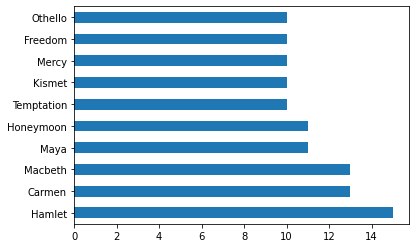

In [70]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [73]:
top_three_df = movies.year.value_counts().iloc[:3]
top_three_df

2017.0    9800
2016.0    8024
2015.0    7482
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

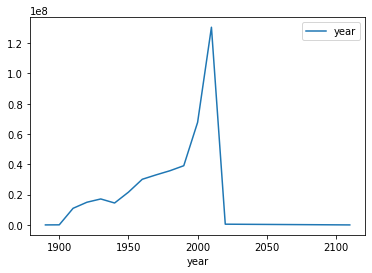

In [110]:
# hmmm...doesn't look quite right
decade_df = movies.groupby((movies.year//10)*10).sum()
decade_df.plot()

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [87]:
common_names = cast.character.value_counts().iloc[:10]
common_names

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [92]:
herself_df = cast[cast.character == 'Herself']
herself_10 = herself_df.name.value_counts().iloc[:10]
herself_10

Queen Elizabeth II           12
Luisa Horga                   9
Joyce Brothers                9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
Oprah Winfrey                 6
Joan Rivers                   6
Sumie Sakai                   6
Mar?a Isabel (III) Mart?n     6
Name: name, dtype: int64

In [93]:
himself_df = cast[cast.character == 'Himself']
himself_10 = himself_df.name.value_counts().iloc[:10]
himself_10

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [104]:
zombie_df = cast[cast.character.str.startswith('Zombie')].character.value_counts().iloc[:10]
zombie_df

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [105]:
police_df = cast[cast.character.str.startswith('Police')].character.value_counts().iloc[:10]
police_df

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

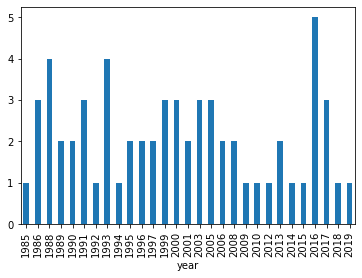

In [129]:
kr_roles = cast[cast.name == 'Keanu Reeves'].groupby('year', sort=False).count()
# kr_roles.plot(kind='bar')
kr_roles.character.sort_index().plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


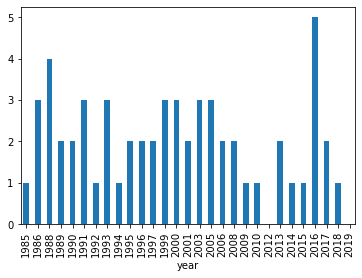

In [130]:
kr_roles.n.sort_index().plot(kind='bar')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

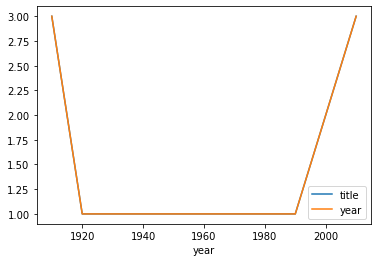

In [141]:
decade_hamlet_df = movies.groupby((hamlet_df.year//10)*10).count()
decade_hamlet_df.plot()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [149]:
leading_role_1960 = cast[(cast.year >= 1960) & (cast.year <= 1969)].n.value_counts()
leading_role_1960.head(1)

1.0    11823
Name: n, dtype: int64

In [150]:
leading_role_2000 = cast[(cast.year >= 2000) & (cast.year <= 2009)].n.value_counts()
leading_role_2000.head(1)

1.0    26344
Name: n, dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [191]:
fo = (cast[cast.name == 'Frank Oz']
         .groupby(['year', 'title'])
         .count()[['name']]
         .rename({'name': 'freq'}, axis=1)
         .sort_values(by=['year'], ascending=True))
fo_2 = fo[fo.freq > 1]
fo_2

freq
year title                                     
1979 The Muppet Movie                         8
1981 An American Werewolf in London           2
     The Great Muppet Caper                   6
1982 The Dark Crystal                         2
1984 The Muppets Take Manhattan               7
1985 Follow That Bird                         3
1992 The Muppet Christmas Carol               7
1996 Muppet Treasure Island                   4
1999 Muppets from Space                       4
     The Adventures of Elmo in Grouchland     3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [193]:
fo_p = (cast[cast.name == 'Frank Oz']
         .groupby(['character'])
         .count()[['name']]
         .rename({'name': 'freq'}, axis=1)
         .sort_values(by=['freq'], ascending=False))
fo_p_2 = fo_p[fo_p.freq > 1]
fo_p_2

,freq
character,
Animal,6
Miss Piggy,6
Yoda,6
Cookie Monster,5
Sam the Eagle,5
Fozzie Bear,4
Bert,3
Grover,2


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

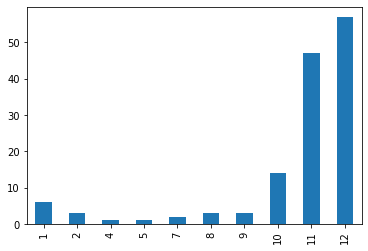

In [188]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

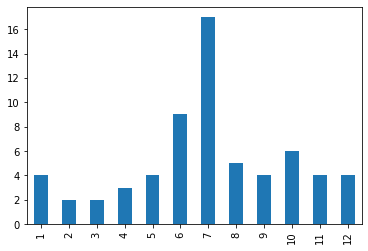

In [194]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

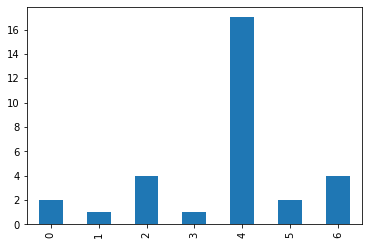

In [195]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [196]:
usa = release_dates[release_dates.country == 'USA']
keanuR = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1)]
(keanuR.merge(usa, how='inner', on=['title', 'year'])
      .sort_values('date')) 

,title,year,name,type,character,n,country,date
20,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
3,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
12,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
13,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
10,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
1,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
4,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
6,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
17,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

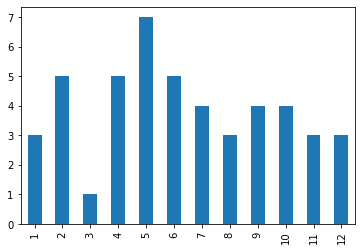

In [197]:
us = release_dates[release_dates.country == 'USA']
keanu_r = cast[(cast.name == 'Keanu Reeves')]
keanu_r = (keanu_r.merge(us, how='inner', on=['title', 'year'])
              .sort_values('date'))
keanu_r.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

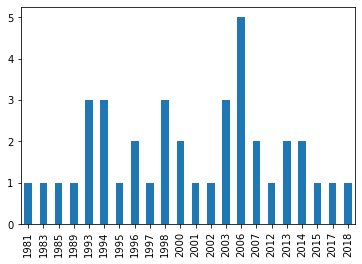

In [198]:
american = release_dates[release_dates.country == 'USA']
ian = cast[(cast.name == 'Ian McKellen')]
ian = (ian.merge(american, how='inner', on=['title', 'year'])
              .sort_values('date'))
ian.date.dt.year.value_counts().sort_index().plot(kind='bar')